<h1>0 - Features engineering</h1>

In [73]:
import csv
import pandas as pd
import os
import numpy as np

<h3>Create new users dataframes with features engineering</h3>

In [88]:
# function
maxTransitions = 6
def returnFeaturesEnginnering(df):
    # First column always is an "one"
    df[0] = 0

    dataframelenght = len(df.index)
    dataList = []

    # For cada element of dataframe, count how many transitions between 1 and 0
    # exists
    for i in range(0, dataframelenght):
        # Must exist a transition in the last column to the script
        # count corretly the number of transitions
        line = df.iloc[i,:180]
        if line[179] == 0:        
            line[180] = 1
        else:
            line[180] = 0
        lineT = line.T.to_list()
        trans = np.bitwise_xor(lineT[0:-1],lineT[1:])
        trans.tolist()
        pos = np.where(trans == 1)
        temp = pos[0][1:] - pos[0][0:-1]
        # fill the line with zeros
        tamanho = temp.__len__()
        temp = np.resize(temp, maxTransitions)
        for k in range(tamanho, maxTransitions):
            temp[k] = 0

        dataList.append(temp.tolist())

    # Replace all the not a numbers to zeros
    frame = pd.DataFrame(dataList)
    frame = frame.replace (np.nan, 0)
    return frame

<h1>1. Prepare dataframes</h1>

Import libraries

In [75]:
import pandas as pd
import os
import numpy as np

Prepare Renan's dataframe

In [76]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)          
          
          # Comment the line above to not do the features enginnering
          df = returnFeaturesEnginnering(df)
          
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)
renan          

,0,1,2,3,4,5,Target letter,Target person
0,8,19,32,120,0,0,A,Renan
1,8,24,29,118,0,0,A,Renan
2,8,23,30,118,0,0,A,Renan
3,10,22,36,111,0,0,A,Renan
4,12,24,34,109,0,0,A,Renan
...,...,...,...,...,...,...,...,...
986,13,36,14,31,45,40,U,Renan
987,14,36,11,31,52,35,U,Renan
988,15,31,18,31,44,40,U,Renan
989,14,40,15,31,47,32,U,Renan


In [172]:
renan

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,Target letter,Target person
0,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
1,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
2,0,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,A,Renan
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
4,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,A,Renan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,U,Renan
987,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,U,Renan
988,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,U,Renan
989,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,U,Renan


Prepare Claudinei's dataframe

In [77]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)

          # Comment the line above to not do the features enginnering
          df = returnFeaturesEnginnering(df)

          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    


Prepare Guilherme's dataframe

In [78]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)

          # Comment the line above to not do the features enginnering
          df = returnFeaturesEnginnering(df)

          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge the group dataframe

In [85]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.reset_index(drop=True)
groupDataframe

,0,1,2,3,4,5,Target letter,Target person
0,8,19,32,120,0,0,A,Renan
1,8,24,29,118,0,0,A,Renan
2,8,23,30,118,0,0,A,Renan
3,10,22,36,111,0,0,A,Renan
4,12,24,34,109,0,0,A,Renan
...,...,...,...,...,...,...,...,...
3322,11,8,11,14,17,118,O,Guilherme
3323,12,7,12,8,17,123,O,Guilherme
3324,11,10,11,8,12,127,O,Guilherme
3325,11,10,11,8,12,127,O,Guilherme


<h1>2. Training</h1>

Merge dataframes

In [ ]:
import pandas as pd

<h3>2.1 Neural network</h3>

Import libraries

In [80]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Preparation for training

In [92]:
X = groupDataframe.iloc[:,0:maxTransitions]
# Remove the comments to execute without feature enginnering
#X = groupDataframe.iloc[:,0:180]
X

,0,1,2,3,4,5
0,8,19,32,120,0,0
1,8,24,29,118,0,0
2,8,23,30,118,0,0
3,10,22,36,111,0,0
4,12,24,34,109,0,0
...,...,...,...,...,...,...
3322,11,8,11,14,17,118
3323,12,7,12,8,17,123
3324,11,10,11,8,12,127
3325,11,10,11,8,12,127


In [93]:
Y1 = groupDataframe.iloc[:,maxTransitions]
# Remove the comments to execute without feature enginnering
#Y1 = groupDataframe.iloc[:,180]
Y1

0       A
1       A
2       A
3       A
4       A
       ..
3322    O
3323    O
3324    O
3325    O
3326    O
Name: Target letter, Length: 3327, dtype: object

In [94]:
Y2 = groupDataframe.iloc[:,maxTransitions+1]
# Remove the comments to execute without feature enginnering
#Y2 = groupDataframe.iloc[:,181]
Y2

0           Renan
1           Renan
2           Renan
3           Renan
4           Renan
          ...    
3322    Guilherme
3323    Guilherme
3324    Guilherme
3325    Guilherme
3326    Guilherme
Name: Target person, Length: 3327, dtype: object

In [95]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=4845)

X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=478)

<h3>Training</h3>

In [124]:
seed = random.randrange(1268) 
clf1 = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(3,6), random_state=1, max_iter=20000, activation='logistic') #2 camadas ocultas com 2 neurônios
clf1.fit(X1_train, np.ravel(y1_train))

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 6), max_iter=20000,
              random_state=1)

In [100]:
seed = random.randrange(1268) 
clf2 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150,120), random_state=seed, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf2.fit(X2_train, np.ravel(y2_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(150, 120), max_iter=5000,
              random_state=1167, solver='sgd')

Testing

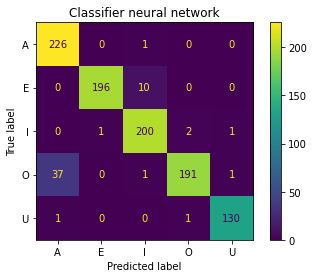

In [126]:
y1_pred = clf1.predict(X1_test)
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred)
plt.title('Classifier neural network')
plt.show()

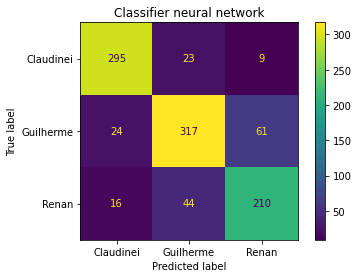

In [109]:
y2_pred = clf2.predict(X2_test)
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
plt.title('Classifier neural network')
plt.show()

In [110]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           A       0.89      0.97      0.93       227
           E       0.99      0.96      0.98       206
           I       0.95      0.98      0.96       204
           O       0.97      0.89      0.93       230
           U       0.98      0.99      0.99       132

    accuracy                           0.95       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.95      0.95      0.95       999



In [ ]:
print(classification_report(y2_test, y2_pred))